# Pre-Exercises

In [1]:
# importing matplotlib.pyplot allows us to generate graphs
import matplotlib.pyplot as plt

import random as rd
import numpy as np

Create a class `Fungus` that gets x and y position passed in the initialization method. The `size` attribute, on the other hand, is to be set randomly between 0 and 200.

Build a method in which the fungi draw themselves at the correct position with a scatterplot. As size `s` in the scatterplot `plt.scatter(x, y, s=...)` the attribute `size` is to be used.

Create 20 fungi. Then go through the list of fungi and find the largest fungus.

When you have found the largest fungus, it should be picked. To do this, create a variable `basket` (outside the loop), which is increased by the size of the picked fungus. After that, the size of the fungus should be set to 0. Repeat this picking until the basket is greater than 500. A `while` loop is definitely helpful here. Plot the fungus forest before and after picking.

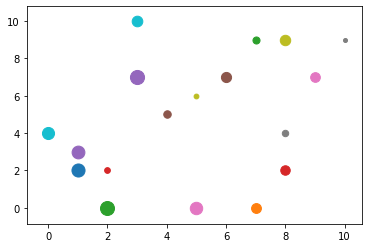

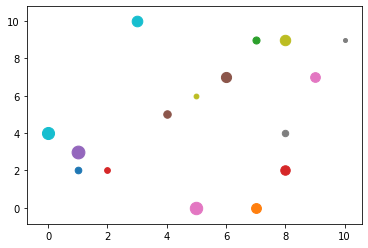

566

In [21]:
class Fungus:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.size = rd.randint(0, 200)
    
    def draw(self):
        plt.scatter(self.x, self.y, s = self.size)
        
    # We use the __lt__ ()"lesser than") method to
    # make the ">" operator work on instances of Fungus
    # Observe below how the "max" function now works on Fungi!
    def __gt__(self, other):
        return self.size > other.size
    
    def pick(self):
        sz = self.size
        self.size = 0
        return sz
    
fungi = [
    Fungus(x = rd.randint(0, 10), y = rd.randint(0, 10)) 
    for _ in range(20)
    ]

for fungus in fungi:
    fungus.draw()
plt.show();

# Imperative way to find max
largest = fungi[0]
for fungus in fungi:
    if fungus.size > largest.size:
        largest = fungus
largest.size

# object oriented way
largest = max(fungi)
largest.size

# functional way (in the case we had no __gt__ method)
def get_size(fungus):
    return fungus.size

largest = max(fungi, key=get_size)
largest.size


# Last Pre-Exercise
basket = 0
while basket <= 500:
    largest = max(fungi)
    basket += largest.pick()

for fungus in fungi:
    fungus.draw()
plt.show();

    
basket

# Exercise

Create a class `PowerPlant`. The initialization method is to be given the arguments `f` (emission factor) and `out` (power output). In addition to these two attributes, the `inoperation` attribute is set to "no" and the `shape` attribute is set to ".".

The following methods are needed:
+ `emissions()` shall calculate the total emissions from `f` times `out` and return the result.
+ `turn_on()` shall set the `inoperation` attribute to "yes".
+ `draw()` shall draw the power plant to a random position (x from 0 to 5, y from 0 to 5) with a scatterplot. (The positions don't have to be saved, but shall be randomly generated each time the power plant is drawn). As form of the marker marker=... is the character that is stored as object attribute under shape. As size s=... the attribtue output divided by 10 is to be used. The color c=... depends on the attribute inoperation: If it says "no", the power plant is drawn red, otherwise green.

Now create 2 classes based on the class power plant (inheritance). They differ only in the initialization method. The class `Water` always has an emission factor `f` of 10 and gets "s" as `shape`. Additionally, there is a new attribute called `type`, which is set to "water". The second subclass `Wind`, has the factor 30, the shape "o" and the type "wind".

Now create 20 power plants in the main program. With a 50% chance it will be a hydroelectric power plant, otherwise it will be a wind power plant. Hydropower plants have a random power between 100 and 500. Wind power plants have a random power between 100 and 2000.

Now go over all the power plants and turn on only the hydro plants. Calculate the total electricity produced and the total emissions produced (only power plants that are turned on contribute to the totals).

Now switch on as many wind power plants as necessary to cover the demand of 4000. To do this, gradually turn on the smallest wind power plant that is not yet turned on until the total electricity produced exceeds 4000. Plot all the power plants. When everything has worked, there should be no red squares in the plot and no green circle larger than a red circle.

Power:  3202
Emissions:  32020
Power: 4390


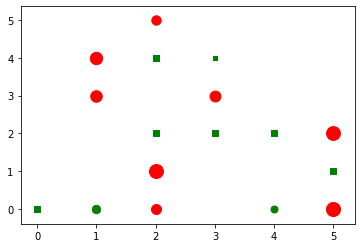

In [37]:
class PowerPlant:
    def __init__(self, f, out):
        self.f = f
        self.out = out
        self.inoperation = 'no'
        self.shape = '.'
        
    def emissions(self):
        return self.f * self.out
    
    def turn_on(self):
        self.inoperation = 'yes'
        
    def draw(self):
        plt.scatter(rd.randint(0,5), rd.randint(0,5)
                   , marker=self.shape
                   , s = self.out / 10
                   , color = 'red' if self.inoperation == 'no' else 'green'
                   )

class Water(PowerPlant):
    def __init__(self, out):
        super(Water, self).__init__(10, out)
        
        self.shape = 's'
        self.type = 'water'

class Wind(PowerPlant):
    def __init__(self, out):
        super(Wind, self).__init__(30, out)
        
        self.shape = 'o'
        self.type = 'wind'
        
    # We use the __lt__ ()"lesser than") method to
    # make the "<" operator work on instances of Wind
    def __lt__(self, other):
        return self.out < other.out
        
powerplants = [
    Wind(rd.randint(100, 2000)) if rd.random() < 0.5 else Water(rd.randint(100, 500))
    for _ in range(20)
]

# turn on hydro
for pp in powerplants:
    if pp.type == 'water':
        pp.turn_on()
        
# collect power and emissions
tot_pow = sum(pp.out for pp in powerplants if pp.inoperation == 'yes')
tot_ems = sum(pp.emissions() for pp in powerplants if pp.inoperation == 'yes')
print("Power: ", tot_pow)
print("Emissions: ", tot_ems)

# turn on windmills
windpps = [pp for pp in powerplants if pp.type == 'wind']
while tot_pow < 4000:
    new_wind = min([pp for pp in windpps if pp.inoperation == 'no'])
    new_wind.turn_on()
    tot_pow += new_wind.out

print("Power:", tot_pow)

# Plot
for pp in powerplants:
    pp.draw()

# Helpful stuff

We now know that a class `B` can inherit methods from a class `A` by defining it as `B(A)`. But what if another class `C` inherits from `B`? Will it also inherit from `A`?

In [3]:
class A:
    X = 63
class B(A):
    pass
class C(B):
    pass

c = C()
c.X # it does!

63

This was foreseeable. Let's have a look at a more interesting case: *Multiple inheritance*

Let's say we have two separate classes:
+ `A1` defines an attribute `X` as `63`
+ `A2` defined an attribute, also named `X`, as `42`

The class `B` inherits from both `A1` and `A2`, just as `C` but in reverse order:

In [4]:
class A1:
    X = 63
class A2:
    X = 42
    
class B(A1, A2):
    pass
class C(A2, A1):
    pass

b = B()
c = C()
b.X, c.X

(63, 42)

We can observe, that the order of inheritance is in fact important!

If we want to have a look at the order at which attribute and method names are looked up, we can use the `__mro__` attribute of a class:

In [8]:
B.__mro__

(__main__.B, __main__.A1, __main__.A2, object)

In [ ]:
C.__mro__

Just above I mentioned a method or attribute can be *overridden*. Let's see how that works.

Say in the last example we also want to add a fusion power plant. It is like a normal power plant, but we need to know how much hydrogen it uses:

In [38]:
class FusionPlant(PowerPlant):
    def __init__(self, hydrogen_demand):
        self.hydrogen_demand = hydrogen_demand
        
fp = FusionPlant(300)
fp.hydrogen_demand

300

That seems to work, but the mindful reader may have noticed: We do not initialize `PowerPlant` proper!

We can observe this easily:

In [39]:
fp.shape, fp.out. fp.f

AttributeError: 'FusionPlant' object has no attribute 'shape'

So how would we do this? We call `super` !

In [41]:
class FusionPlant(PowerPlant):
    def __init__(self, f, out, hydrogen_demand):
        super(FusionPlant, self).__init__(f, out)
        
        self.hydrogen_demand = hydrogen_demand
        
fp = FusionPlant(0.1, 10_000, 300)
fp.hydrogen_demand, fp.out

(300, 10000)